In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(train_X, train_y), (test_X, test_y) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_X = train_X /255


In [ ]:
test_X = test_X/255

In [ ]:
len(train_X)

60000

In [ ]:
#pixels of 1 image is 28 by 28 pixels
train_X[0].shape

(28, 28)

In [ ]:
train_X[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

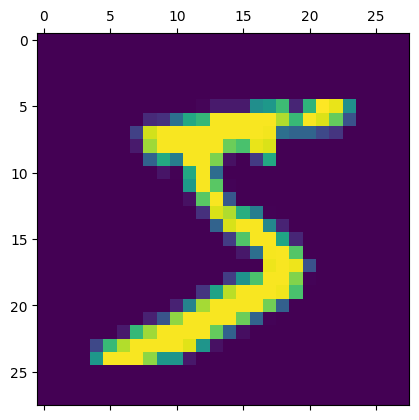

In [ ]:
plt.matshow(train_X[0])

In [ ]:
train_y[0]

5.0

In [ ]:
train_y[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
train_X.shape

(60000, 28, 28)

In [ ]:
test_X.shape

(10000, 28, 28)

In [ ]:
#our purpose is to reshape the 28 by 28 pixel that is 2D of each image into 1D of each image

X_train_flattened = train_X.reshape(len(train_X),28*28)

#28*28 = 784
X_train_flattened.shape

(60000, 784)

In [ ]:
X_test_flattened = test_X.reshape(len(test_X),28*28)
X_test_flattened.shape

(10000, 784)

In [ ]:
train_X.shape

(60000, 28, 28)

In [ ]:
test_X.shape

(10000, 28, 28)

In [ ]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model = keras.Sequential([
    # Dense means all the neurons in 1 st layer connect with all the neuron in 2nd layer
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    # sparce means out output is an integer that is basically train_y
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened,train_y,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4648 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3028 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2728 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.9258


In [ ]:
model.evaluate(X_test_flattened,test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.2699 - accuracy: 0.9252


[0.26987770199775696, 0.9251999855041504]

In [ ]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 871us/step


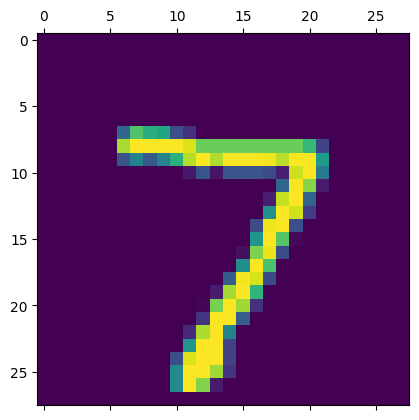

In [ ]:
plt.matshow(test_X[0])

In [ ]:
y_predicted[0]

array([2.3047231e-02, 3.0732360e-07, 7.6297022e-02, 9.4698513e-01,
       2.8425420e-03, 1.3595402e-01, 1.3552992e-06, 9.9981838e-01,
       9.3233742e-02, 5.3079247e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

2

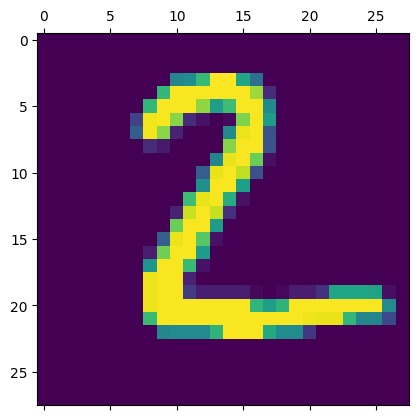

In [ ]:
plt.matshow(test_X[1])
np.argmax(y_predicted[1])

In [ ]:
# in order to make the eleemnts comparable in both arrays of y_predicted and test_y we have to make y_predicted' integer rray from the .
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
cm = tf.math.confusion_matrix(labels = test_y,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   4,    8,  928,   15,   10,    6,   11,   10,   38,    2],
       [   4,    0,   19,  909,    0,   34,    2,   12,   24,    6],
       [   1,    1,    4,    1,  930,    0,   10,    3,   11,   21],
       [   9,    3,    4,   20,   11,  794,   13,    5,   28,    5],
       [  11,    3,    9,    0,    8,   15,  907,    2,    3,    0],
       [   1,    5,   25,    4,    7,    1,    0,  953,    5,   27],
       [   7,    7,    6,   16,    9,   34,    8,   12,  871,    4],
       [  11,    7,    1,    7,   42,   11,    0,   32,    9,  889]],
      dtype=int32)>

In [ ]:
tf.reduce_sum(cm,axis=0,keep_dims = True)

NameError: ignored

Text(95.72222222222221, 0.5, 'Truth')

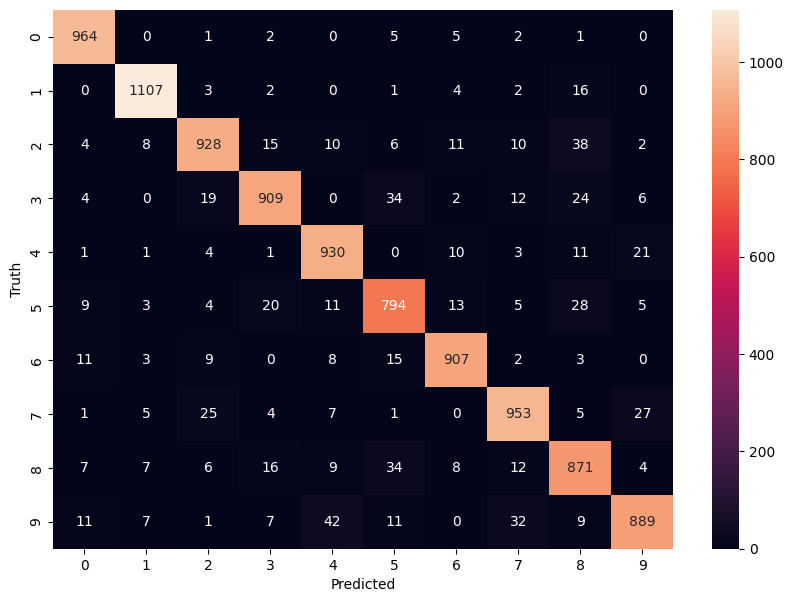

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    # Dense means all the neurons in 1 st layer connect with all the neuron in 2nd layer
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')

])

model.compile(
    optimizer = 'adam',
    # sparce means out output is an integer that is basically train_y
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened,train_y,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2729 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1246 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0876 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0672 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9841


In [ ]:
model.evaluate(X_test_flattened,test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9742


[0.07964806258678436, 0.9742000102996826]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
model.evaluate(X_test_flattened,test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.0796 - accuracy: 0.9742


[0.07964806258678436, 0.9742000102996826]

In [ ]:
cm1 = tf.math.confusion_matrix(labels = test_y,predictions = y_predicted_labels)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    0,    0,    2,    6,    3,    5,    4,    3],
       [   0, 1125,    3,    1,    0,    1,    2,    0,    3,    0],
       [   3,    2,  989,    4,    3,    1,    1,   18,   11,    0],
       [   0,    0,    1,  980,    0,   11,    0,    9,    5,    4],
       [   0,    0,    1,    1,  967,    1,    4,    3,    0,    5],
       [   1,    0,    0,    4,    1,  877,    4,    1,    3,    1],
       [   4,    3,    0,    0,    2,   11,  932,    0,    6,    0],
       [   0,    5,    3,    1,    0,    0,    0, 1011,    3,    5],
       [   1,    0,    1,    4,    4,   19,    0,    7,  936,    2],
       [   2,    4,    0,    5,    9,    5,    0,   11,    5,  968]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

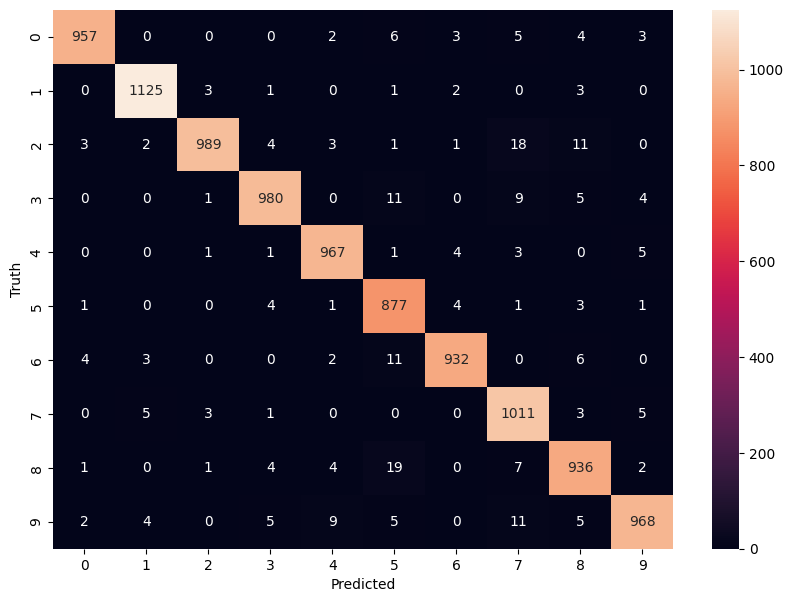

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm1,annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    # Dense means all the neurons in 1 st layer connect with all the neuron in 2nd layer
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')

])

model.compile(
    optimizer = 'adam',
    # sparce means out output is an integer that is basically train_y
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(train_X,train_y,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2712 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1231 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0847 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0647 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0519 - accuracy: 0.9838
